In [18]:
# imports
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import scipy.stats
from scipy.special import binom, factorial
import powerlaw

# my functions / models
from models import random_graph, watts_strogatz, barabasi_albert, show_statistics, pdf_emp, cdf_emp, dist_cdf_plot, dist_pdf_plot, show_degree_distribution

# visualisation, avoid runtime warnings etc.
import warnings
warnings.filterwarnings('ignore')

#### 1. Implement the following models in the language of your preference:
* Random graph.
* Watts-Strogatz model.
* Barabasi-Albert model.

implemented and placed in __models/graph.py__ file

#### Set the number of nodes to N = 2000, simulate the models for various settings of the parameters and save the graphs. You may use graph data structures provided by the existing network libraries or your own class to store the graphs. For each graph:
* Report the number of vertices and edges.
* Compute the average degree and the variance of the degree distribution.

models/utils.py - function __show_statistics(graph: nx.Graph) -> dict__.


In [2]:
N = 2000
p = [1/4, 1/2, 3/4]

* Generate the frequency plot for the degrees of the nodes.
* Fit a model distribution to the obtained data. In case of the Barabasi-Albert graph, you may have a look at http://tuvalu.santafe.edu/~aaronc/powerlaws/

All the functions for plotting and fitting distributions are placed in __models/plots.py__.

N=2000, p=0.25
statistics: {'vertices': 2000, 'edges': 499546, 'mean_degree': 499.546, 'var_degree': 364.07388399999996}


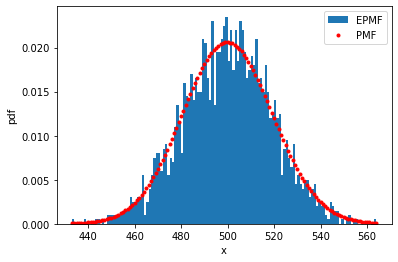

N=2000, p=0.5
statistics: {'vertices': 2000, 'edges': 999166, 'mean_degree': 999.166, 'var_degree': 509.306444}


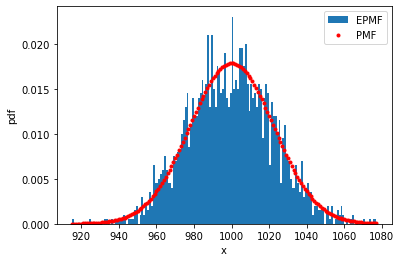

N=2000, p=0.75
statistics: {'vertices': 2000, 'edges': 1498267, 'mean_degree': 1498.267, 'var_degree': 386.285711}


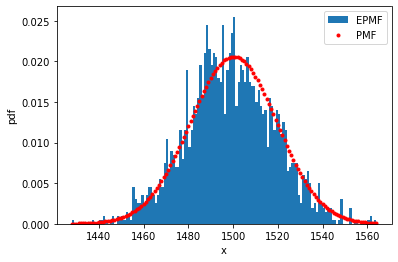

In [3]:
# random graph

for p_i in p:
    network = random_graph(N, p_i)
    print(f'N={N}, p={p_i}')

    show_degree_distribution(network = network)

    degree_list = [val for _, val in network.degree()]
    domain_start, domain_end = min(degree_list), max(degree_list)

    # fit binominal distribution
    dist_pdf_plot(domain=(domain_start, domain_end), distribution=scipy.stats.binom, discrete=True, n=N, p=p_i)
    plt.legend()
    plt.show()

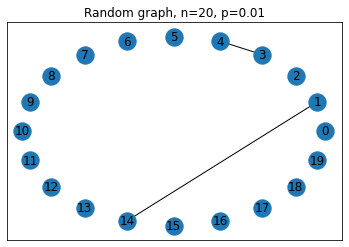

In [19]:
n=20
p=1/100
network = random_graph(n,p)

layout = nx.circular_layout(network)

nx.draw_networkx(network, pos=layout)
plt.title(f'Random graph, n={n}, p={p}')
plt.show()

N=2000, k=10, beta=0.1
statistics: {'vertices': 2000, 'edges': 10000, 'mean_degree': 10.0, 'var_degree': 0.914}


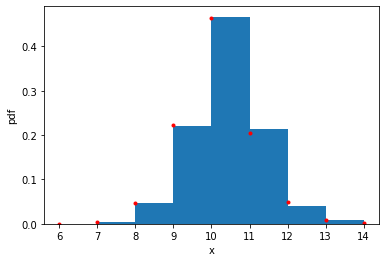

N=2000, k=10, beta=0.5
statistics: {'vertices': 2000, 'edges': 10000, 'mean_degree': 10.0, 'var_degree': 3.998}


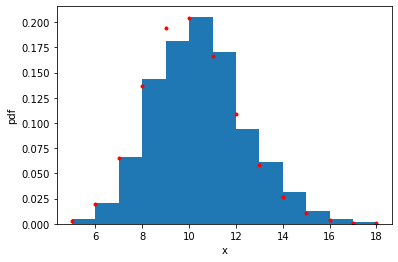

N=2000, k=10, beta=0.9
statistics: {'vertices': 2000, 'edges': 10000, 'mean_degree': 10.0, 'var_degree': 4.726}


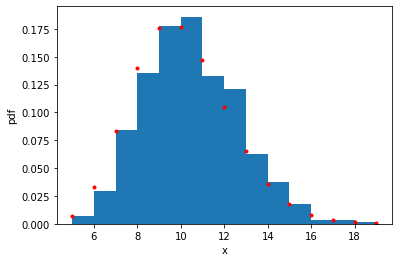

N=2000, k=100, beta=0.1
statistics: {'vertices': 2000, 'edges': 100000, 'mean_degree': 100.0, 'var_degree': 10.169}


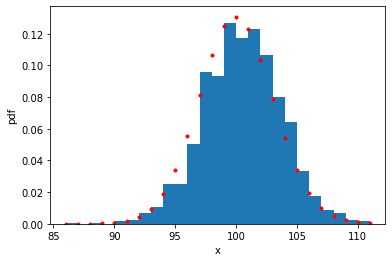

N=2000, k=100, beta=0.5
statistics: {'vertices': 2000, 'edges': 100000, 'mean_degree': 100.0, 'var_degree': 45.652}


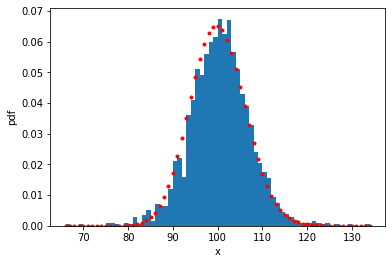

N=2000, k=100, beta=0.9
statistics: {'vertices': 2000, 'edges': 100000, 'mean_degree': 100.0, 'var_degree': 77.285}


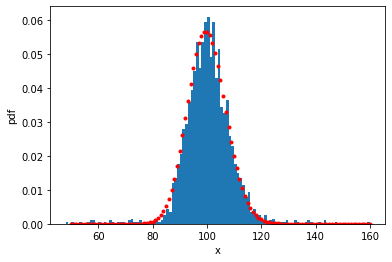

In [4]:
def w_s_pdf(x: np.array, k: int, p: float) -> np.array:
    """ function from lecture giving watts-strogatz graph PMF for given domain x.
    Due to computing power limitation it works poorly for k > 260. """

    # def minimum
    f_x_k = np.maximum(np.minimum(x-k/2, np.ones(len(x))*k/2), np.zeros(len(x)))

    pmf = []

    for j, x_j in enumerate(x):
        # try:
        i = np.linspace(0, int(f_x_k[j]), int(f_x_k[j])+1)
        # for i in n:

        pmf.append(np.sum(binom(k/2,i) * (1-p)**i * p**(k/2-i) * (p*k/2)**(x_j-i-k/2) / factorial(x_j - i - k/2) * np.exp(-1 * p * k/2)))

    return pmf

w_s_pdf(x=np.linspace(2,12,11), k=4,p=1/2)

# watts-strogatz graph
k = [10,100]
beta = [0.1, 0.5, 0.9]

for k_i in k:
    for beta_j in beta:
        network = watts_strogatz(N, k_i, beta_j)
        print(f'N={N}, k={k_i}, beta={beta_j}')

        show_degree_distribution(network = network)

        degree_list = [val for _, val in network.degree()]
        domain_start, domain_end = min(degree_list), max(degree_list)

        # fit binominal distribution
        x = np.linspace(domain_start, domain_end, domain_end - domain_start + 1)
        plt.plot(x, w_s_pdf(x, k=k_i, p = beta_j),'r.', label='PMF')
        plt.show()


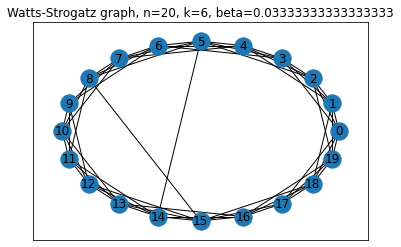

In [22]:
n=20
k=6
beta=1/30
network = watts_strogatz(n,k,beta)

layout = nx.circular_layout(network)

nx.draw_networkx(network, pos=layout)
plt.title(f'Watts-Strogatz graph, n={n}, k={k}, beta={beta}')
plt.show()

N=2000, m=2
Calculating best minimal value for power law fit
alpha calculated by powerlaw: 3.05470956301522
statistics: {'vertices': 2000, 'edges': 3996, 'mean_degree': 3.996, 'var_degree': 33.236984}


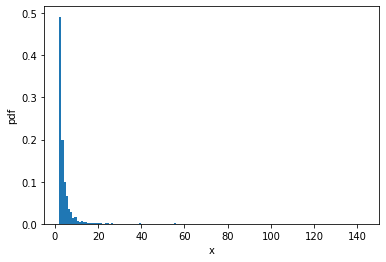

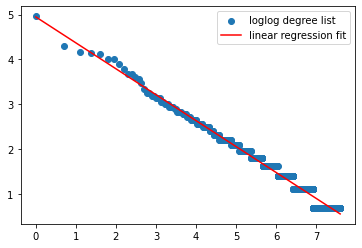

N=2000, m=20
Calculating best minimal value for power law fit
alpha calculated by powerlaw: 2.965454692433145
statistics: {'vertices': 2000, 'edges': 39600, 'mean_degree': 39.6, 'var_degree': 1139.463}


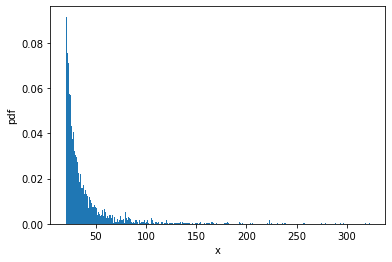

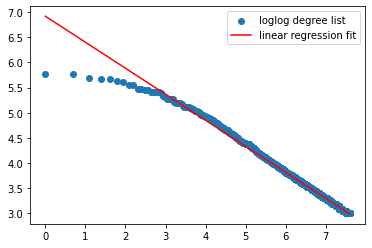

N=2000, m=40
Calculating best minimal value for power law fit
alpha calculated by powerlaw: 2.9363502177705296
statistics: {'vertices': 2000, 'edges': 78400, 'mean_degree': 78.4, 'var_degree': 3366.2979999999993}


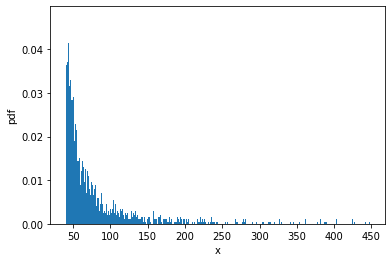

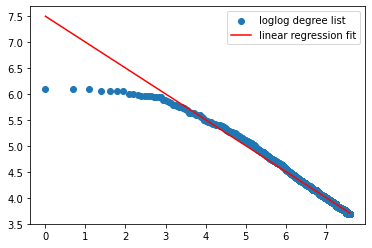

In [21]:
# Barabasi-Albert
# TODO: change that
m = [2,20,40]

for m_i in m:
    network = barabasi_albert(N, m_i)
    print(f'N={N}, m={m_i}')

    degree_list = [val for _, val in network.degree()]

    # fit powerlaw
    print(f'alpha calculated by powerlaw: {powerlaw.Fit(degree_list).alpha}')


    domain_start, domain_end = min(degree_list), max(degree_list)
    show_degree_distribution(network = network)
    plt.show()

    x = np.log(np.linspace(1,len(degree_list)+1,len(degree_list)))
    y = sorted(np.log(degree_list),reverse = True)
    plt.scatter(x, y,label='loglog degree list')

    # fit linear regression
    params = np.polyfit(x,y,1)
    plt.plot(x,params[0]*x+params[1], 'r-', alpha=1, label='linear regression fit')
    plt.legend()
    plt.show()

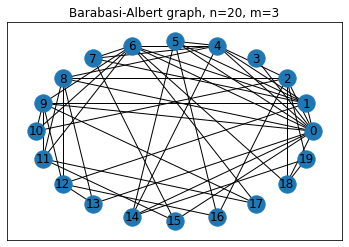

In [17]:
n=20
m=3

network = barabasi_albert(n,m)

layout = nx.circular_layout(network)

nx.draw_networkx(network, pos=layout)
plt.title(f'Barabasi-Albert graph, n={n}, m={m}')
plt.show()

#### 2. LiveJournal (www.livejournal.com) is a blogging site very popular in Russia and Eastern Europe1. It has a simple API and a generous policy for data mining (see http://www.livejournal.com/bots/).
* Write a function that fetches a list of friends of a test user valerois and transforms it into a graph.

* Once you have the list of friends, you may use the snowball sampling method (also known as chain sampling or respondent-driven sampling) to map the social network. Limit the depth of the search to two or three levels to avoid an
explosion of data.

* Save the results into a file. From know on work with the local copy of the network instead of sampling it every time.


The injection is placed in __models/live_journal.py__.

File is saved in csv file: __data/valerois_network_depth_2.csv__.

I work with depth = 2, it means, there are saved connections:
* valerois -- friends of valerois
* friends of valerois -- friends of friends of valerois.

In [6]:
network_df = pd.read_csv('data/valerois_network_depth_2.csv')
network_df.sample(5)

,from_node,to_node
46963,ksenia_vasil,irisecka
197249,alexpashkov,timgud
305420,viks_vaporub,casa
171890,milaanufrieva,volchenkova
52478,karial,a_cheremsha


In [7]:
network_df.describe()

,from_node,to_node
count,310307,310307
unique,300,130919
top,alexpashkov,valerois
freq,4734,292


In [8]:
network = nx.from_pandas_edgelist(network_df,'from_node','to_node')

* Determine the number of nodes and edges in the network.

In [9]:
print(f'valerois connections: {len(network["valerois"])}')
print(f'statistics:\n{show_statistics(network)}')


valerois connections: 299
statistics:
{'vertices': 130919, 'edges': 308489, 'mean_degree': 4.712669665976673, 'var_degree': 5869.1879291380565}


* Find celebrities in the network (hint: degree centrality).

In [10]:
degree_centrality = nx.degree_centrality(network)

dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))

{'alexpashkov': 0.03628225301333659,
 'borisakunin': 0.034853877999969446,
 'trirub': 0.034387937487587644,
 'no_globalism': 0.03334148092699247,
 'lara_x': 0.033196351914939116,
 'gogol': 0.0327838799859454,
 'morena_morana': 0.03247834522372783,
 'matveychev_oleg': 0.03197421286606884,
 'goodspider': 0.0319283826517362,
 'timgud': 0.031340228234467374,
 'das_foland': 0.03030904841198307,
 'ministrkultury': 0.03030141004292763,
 'alexmonc': 0.030247941459539556,
 'camoe': 0.03010281244748621,
 'sass_hummel': 0.02998059854259918,
 'altruisttka': 0.029766724209046882,
 'leo_taxil': 0.02956812661360546,
 'sergey_gora': 0.029529934768328263,
 'evroru': 0.029323698803831403,
 'artem_klyushin': 0.029117462839334543,
 'magesqueen': 0.028704990910340823,
 'sosedgeorg': 0.02831543408851342,
 'qualityperson': 0.028246688767014465,
 'xcontcom': 0.02659680105103958,
 'natura_andrey': 0.025817687407384774,
 'karial': 0.025710750240608624,
 'morseanen': 0.025710750240608624,
 'stalic': 0.0248934447

* Plot the degree distribution of the network.

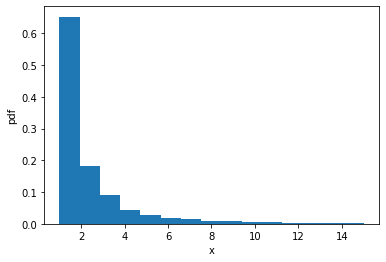

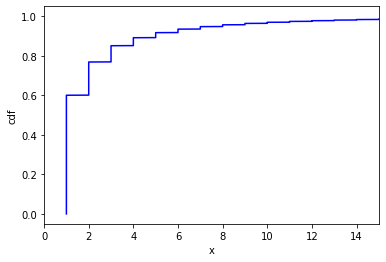

In [11]:
degree_list = [val for key, val in network.degree()]
ex = np.mean(degree_list)


plt.figure(0)
pdf_emp(degree_list,bins=15,range=[1,15])
plt.xlabel('x')
plt.ylabel('pdf')
# dist_pdf_plot(domain=(1,15), distribution=scipy.stats.expon, scale=2)
plt.figure(1)
plt.xlim(0,15)
plt.xlabel('x')
plt.ylabel('cdf')
cdf_emp(degree_list,show=True)

as we can see it's some kind of discrete exponential / gamma-like distribution

* Find communication bottlenecks (hint: betweenness centrality).

Due to huge computing power needed for this task (130k nodes), I use approximation working on a random k=100 elements subset

In [12]:
%%time
betweenness_centrality = nx.betweenness_centrality(network, k=100)

CPU times: total: 1min 2s
Wall time: 1min 3s


In [13]:
dict(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))

{'valerois': 0.06980363959004932,
 'timgud': 0.0510467654155822,
 'matveychev_oleg': 0.050049629597731064,
 'karial': 0.044097827428905466,
 'ministrkultury': 0.04312691196127042,
 'trirub': 0.03857417456410912,
 'borisakunin': 0.034682778465886445,
 'alexpashkov': 0.033423024815878555,
 'dementievskiy': 0.03210122072966192,
 'a_dyukov': 0.03134476299595527,
 'morena_morana': 0.031017826639675897,
 'magesqueen': 0.029378106387547134,
 'sol_tat': 0.029014846213665235,
 'ranja': 0.02878237040181383,
 'olganovikova': 0.027426688102932827,
 'irenabar': 0.027350891990072318,
 'vorodis': 0.02725712837119702,
 'le_milady': 0.02678637377359758,
 'morseanen': 0.026582099127059652,
 'elhombresombro': 0.026487897217628516,
 'samoleg': 0.026093122403286567,
 'farbys': 0.025868402302284446,
 'f3': 0.0257497525224733,
 'greenarine': 0.024370952319613164,
 'nicety': 0.024253721193851874,
 'evroru': 0.023955818592563585,
 'red_garnet': 0.023887366753784424,
 'shpilenok': 0.023189961294324966,
 'pavelr